In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

In [2]:
df = pd.read_csv('3.csv')
df

,group,client_id,click_flg
0,test,1,1
1,test,2,0
2,test,3,0
3,test,4,1
4,test,5,1
...,...,...,...
20028,control,20029,0
20029,control,20030,1
20030,control,20031,1
20031,control,20032,0


In [3]:
a = df[df['group'] == 'test']
b = df[df['group'] == 'control']

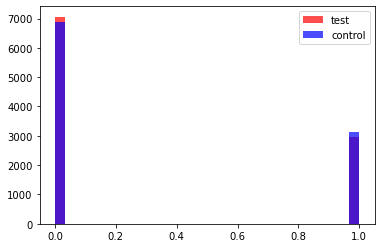

In [6]:
plt.hist(a['click_flg'], alpha=0.7, bins=30, label='test', color='red');
plt.hist(b['click_flg'], alpha=0.7, bins=30, label='control', color='blue');
plt.legend();

In [12]:
positive = df.groupby('group')['click_flg'].sum().values.tolist()
positive

[3127, 2962]

In [15]:
pn = df.groupby('group')['client_id'].nunique().values.tolist()
pn

[10010, 10023]

In [17]:
stat, p_val = proportions_ztest(positive, pn, alternative='smaller')
p_val

0.9952729749937792

p-value близко к 1, значит конверсия не увеличилась.

Это действительно так, потому что если мы посчитаем конверсии:

In [21]:
gb = df.groupby('group').agg({'click_flg': 'sum', 'client_id': 'nunique'})
gb['conversion'] = gb['click_flg'] / gb['client_id']
gb

,click_flg,client_id,conversion
group,,,
control,3127,10010,0.312388
test,2962,10023,0.295520


То конверсия на контроле 0.31, а на тесте - 0.29